#**Assignment #5 Visualization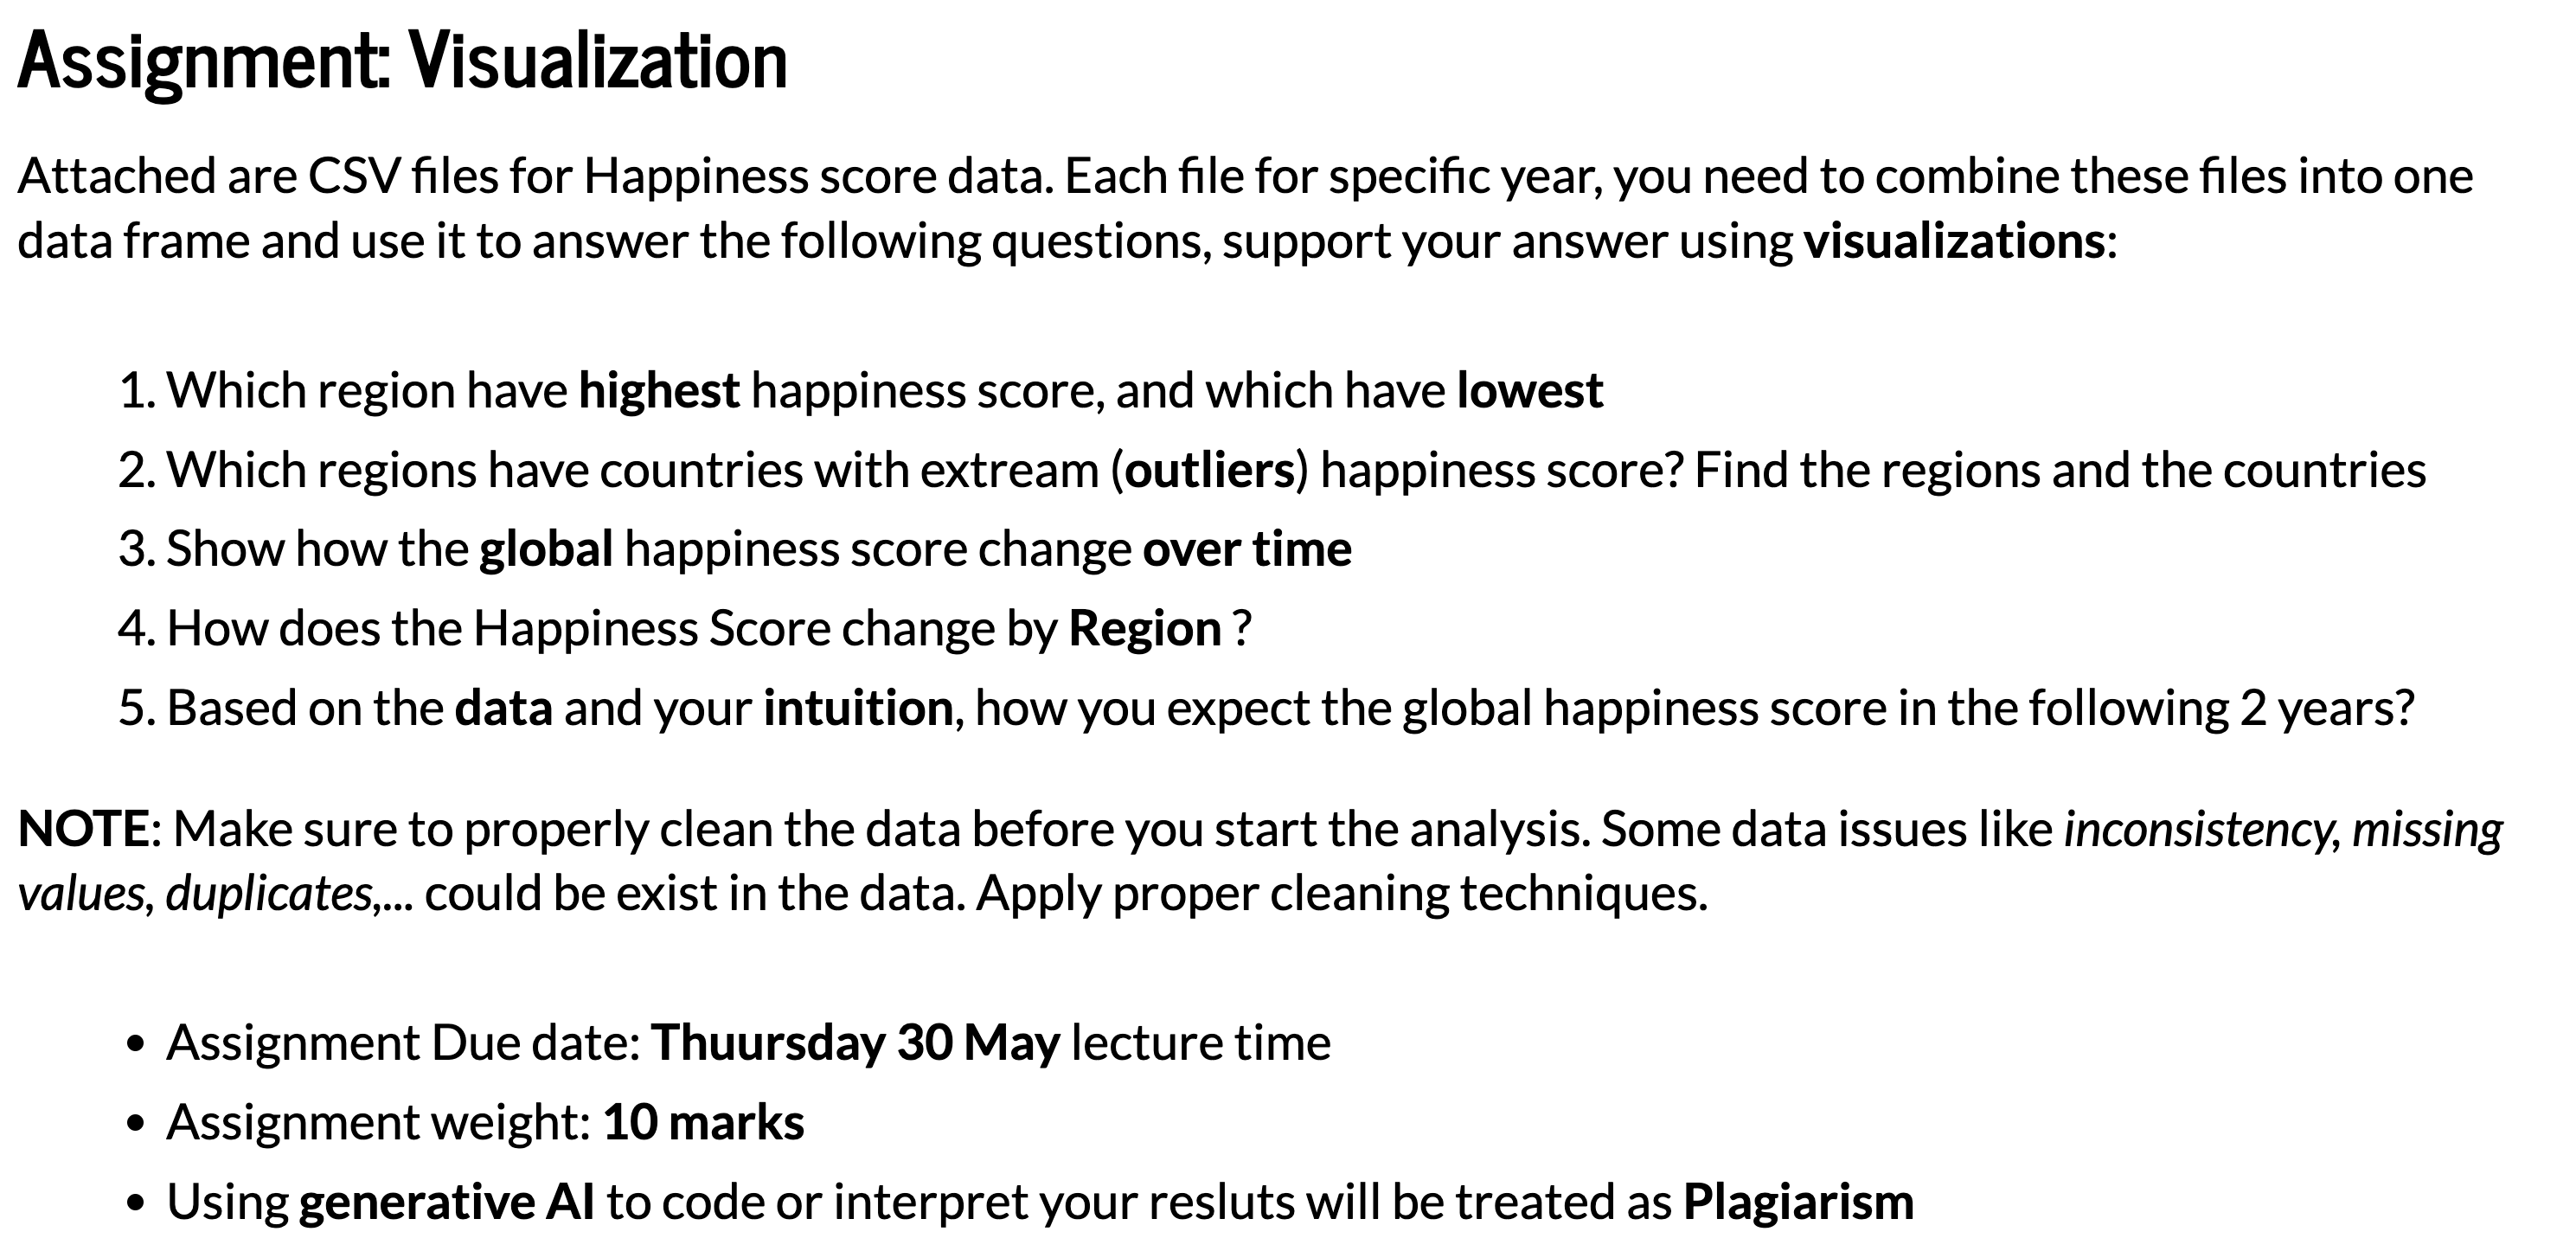**

*   **Nour Zayed**
*   **ID:1210264**

**Imports Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

**Load files**

In [2]:
# Load CSV files
files_paths = [
    "2015.csv",
    "2016.csv",
    "2017.csv",
    "2018.csv",
    "2019.csv"
]

Read All Files

In [3]:
# Read CSV files into DataFrames
files = [pd.read_csv(file) for file in files_paths]

**Rename Columns**

In [4]:
column_names = {
    '2015': {'Country': 'Country', 'Region': 'Region', 'Happiness Rank': 'Happiness Rank', 'Happiness Score': 'Happiness Score', 'Economy (GDP per Capita)': 'GDP per capita', 'Family': 'Social support', 'Health (Life Expectancy)': 'Healthy life expectancy', 'Freedom': 'Freedom to make life choices', 'Trust (Government Corruption)': 'Perceptions of corruption', 'Generosity': 'Generosity', 'Dystopia Residual': 'Dystopia Residual', 'Standard Error': 'Standard Error'},
    '2016': {'Country': 'Country', 'Region': 'Region', 'Happiness Rank': 'Happiness Rank', 'Happiness Score': 'Happiness Score', 'Economy (GDP per Capita)': 'GDP per capita', 'Family': 'Social support', 'Health (Life Expectancy)': 'Healthy life expectancy', 'Freedom': 'Freedom to make life choices', 'Trust (Government Corruption)': 'Perceptions of corruption', 'Generosity': 'Generosity', 'Dystopia Residual': 'Dystopia Residual', 'Lower Confidence Interval': 'Lower Confidence Interval', 'Upper Confidence Interval': 'Upper Confidence Interval'},
    '2017': {'Country': 'Country', 'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score', 'Economy..GDP.per.Capita.': 'GDP per capita', 'Family': 'Social support', 'Health..Life.Expectancy.': 'Healthy life expectancy', 'Freedom': 'Freedom to make life choices', 'Trust..Government.Corruption.': 'Perceptions of corruption', 'Generosity': 'Generosity', 'Dystopia.Residual': 'Dystopia Residual', 'Whisker.high': 'Whisker.high', 'Whisker.low': 'Whisker.low'},
    '2018': {'Country or region': 'Country', 'Score': 'Happiness Score', 'GDP per capita': 'GDP per capita', 'Social support': 'Social support', 'Healthy life expectancy': 'Healthy life expectancy', 'Freedom to make life choices': 'Freedom to make life choices', 'Generosity': 'Generosity', 'Perceptions of corruption': 'Perceptions of corruption'},
    '2019': {'Country or region': 'Country', 'Score': 'Happiness Score', 'GDP per capita': 'GDP per capita', 'Social support': 'Social support', 'Healthy life expectancy': 'Healthy life expectancy', 'Freedom to make life choices': 'Freedom to make life choices', 'Generosity': 'Generosity', 'Perceptions of corruption': 'Perceptions of corruption'}
}

**combine these files into one data frame**

In [5]:
dfs = []

for file, year in zip(files_paths, column_names.keys()):
    df = pd.read_csv(file).rename(columns=column_names[year])
    df['Year'] = int(year)
    relevant_columns = ['Year', 'Country', 'Happiness Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity'] + [col for col in ['Happiness Rank', 'Dystopia Residual', 'Region', 'Standard Error', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Whisker.high', 'Whisker.low'] if col in df.columns]
    dfs.append(df[relevant_columns])



# Combine all DataFrames into a single DataFrame
data = pd.concat(dfs, ignore_index=True)
data


,Year,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Happiness Rank,Dystopia Residual,Region,Standard Error,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
0,2015,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1.0,2.51738,Western Europe,0.03411,NaN,NaN,NaN,NaN
1,2015,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.0,2.70201,Western Europe,0.04884,NaN,NaN,NaN,NaN
2,2015,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,3.0,2.49204,Western Europe,0.03328,NaN,NaN,NaN,NaN
3,2015,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,2.46531,Western Europe,0.03880,NaN,NaN,NaN,NaN
4,2015,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,5.0,2.45176,North America,0.03553,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2019,Rwanda,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,2019,Tanzania,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779,2019,Afghanistan,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780,2019,Central African Republic,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Check the Nan Values and fill it (*just for important columns i need to use) before start use Data**

In [6]:
# Check for NaN values in each column
nan_values = data.isna().sum()
print("NaN values in each column before filling:",nan_values)

country_region_pairs = data[['Country', 'Region']].dropna().drop_duplicates()

# Create a mapping dictionary from the extracted pairs
country_region_mapping = dict(zip(country_region_pairs['Country'], country_region_pairs['Region']))

# Fill missing region values based on the mapping
data['Region'] = data['Region'].fillna(data['Country'].map(country_region_mapping))

# Check for NaN values after filling
nan_values_after = data.isna().sum()
print("\n \n NaN values after filling:", nan_values_after)

NaN values in each column before filling: Year                              0
Country                           0
Happiness Score                   0
GDP per capita                    0
Social support                    0
Healthy life expectancy           0
Freedom to make life choices      0
Perceptions of corruption         1
Generosity                        0
Happiness Rank                  312
Dystopia Residual               312
Region                          467
Standard Error                  624
Lower Confidence Interval       625
Upper Confidence Interval       625
Whisker.high                    627
Whisker.low                     627
dtype: int64

 
 NaN values after filling: Year                              0
Country                           0
Happiness Score                   0
GDP per capita                    0
Social support                    0
Healthy life expectancy           0
Freedom to make life choices      0
Perceptions of corruption         1
Generosity     

In [7]:
data.drop_duplicates(subset=['Year', 'Country'], inplace=True)
data

,Year,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Happiness Rank,Dystopia Residual,Region,Standard Error,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
0,2015,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1.0,2.51738,Western Europe,0.03411,NaN,NaN,NaN,NaN
1,2015,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.0,2.70201,Western Europe,0.04884,NaN,NaN,NaN,NaN
2,2015,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,3.0,2.49204,Western Europe,0.03328,NaN,NaN,NaN,NaN
3,2015,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,2.46531,Western Europe,0.03880,NaN,NaN,NaN,NaN
4,2015,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,5.0,2.45176,North America,0.03553,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2019,Rwanda,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN,NaN,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN
778,2019,Tanzania,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN,NaN,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN
779,2019,Afghanistan,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN,NaN,Southern Asia,NaN,NaN,NaN,NaN,NaN
780,2019,Central African Republic,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN,NaN,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN


***1. Which region have highest happiness score, and which have lowest?***


 Answer of Question 1



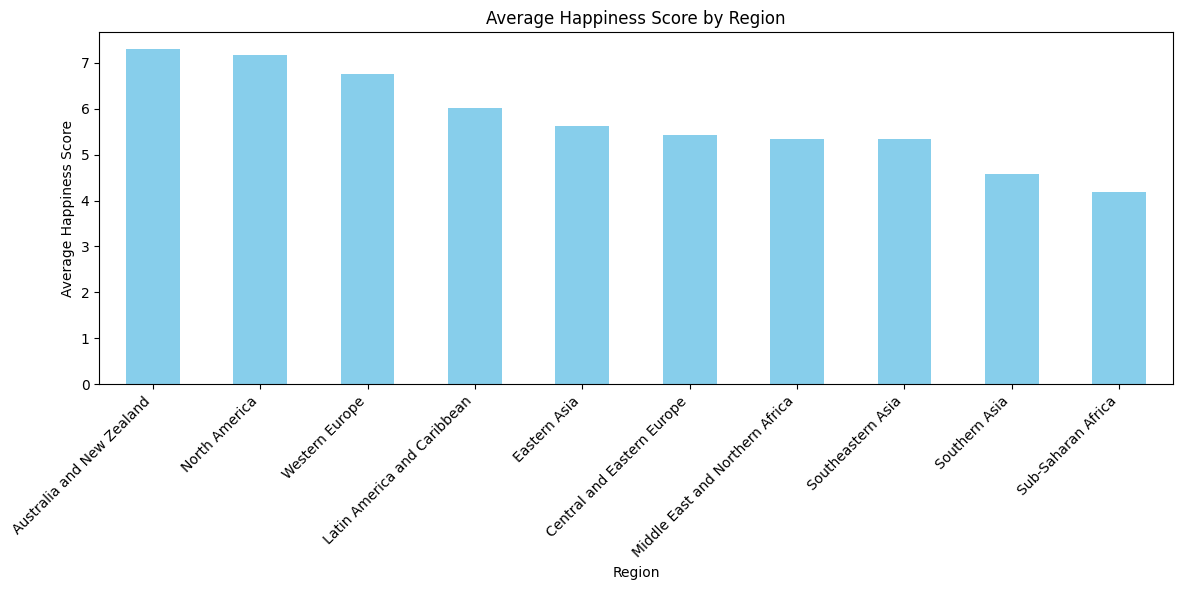


As we see in the Bar char :

Region with the highest happiness score: Australia and New Zealand= (7.294600004959106)
Region with the lowest happiness score: Sub-Saharan Africa =(4.188482052181929)


In [8]:
#Q1
print("\n Answer of Question 1\n")
region_happiness = data.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

# Find the regions with the highest and lowest happiness scores
highest_happiness_score = region_happiness.idxmax()
lowest_happiness_score = region_happiness.idxmin()

# Plot the average happiness scores by region
plt.figure(figsize=(12, 6))
region_happiness.plot(kind='bar', color='skyblue')
plt.title('Average Happiness Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nAs we see in the Bar char :\n")
print(f"Region with the highest happiness score: {highest_happiness_score}= ({region_happiness.max()})")
print(f"Region with the lowest happiness score: {lowest_happiness_score} =({region_happiness.min()})")



***2. Which regions have countries with extream (outliers) happiness score? Find the regions and the countries***


Question 2 part 1 (For each Region)


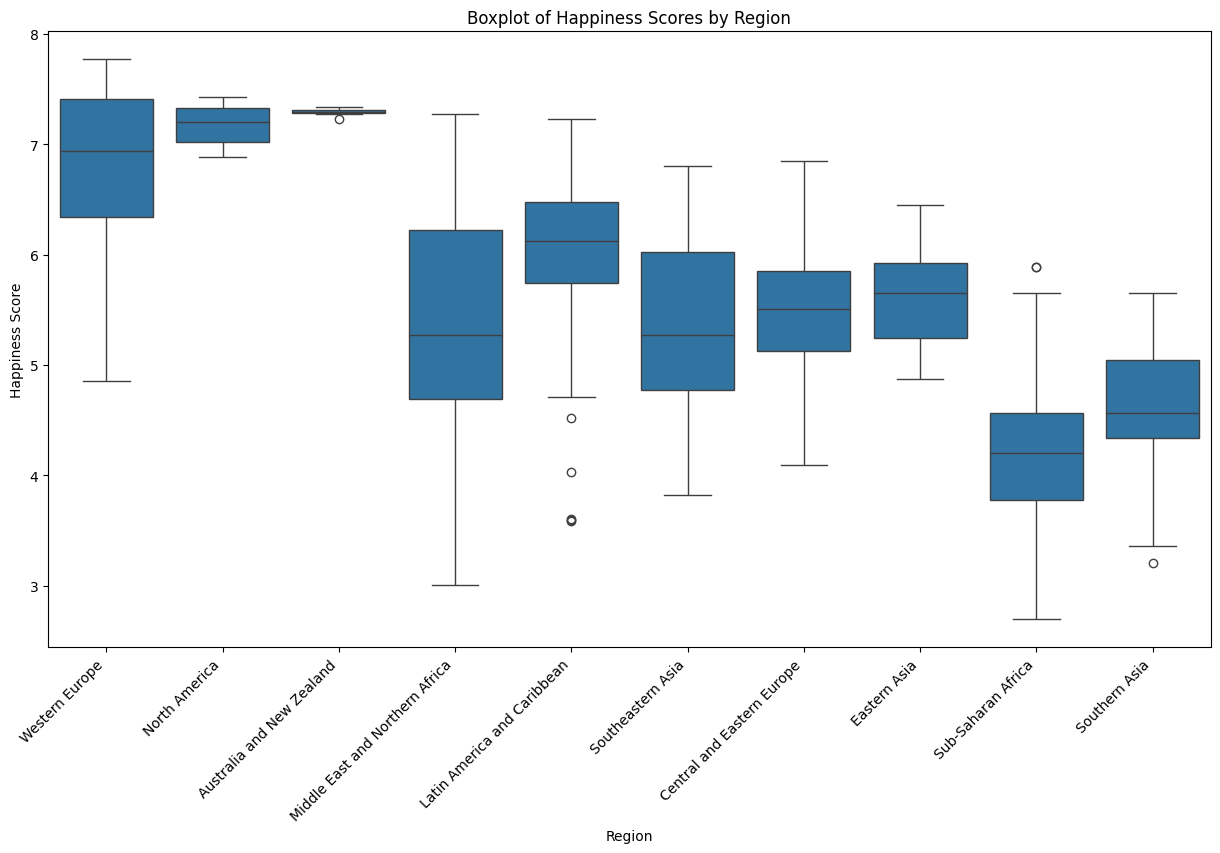

Regions with countries having extreme happiness scores:
Region
Latin America and Caribbean    5
Sub-Saharan Africa             2
Australia and New Zealand      1
Southern Asia                  1
Name: count, dtype: int64


In [10]:
print("\nQuestion 2 part 1 (For each Region)")

# Plot the boxplot of Happiness Scores by Region
plt.figure(figsize=(15, 8))
sns.boxplot(x='Region', y='Happiness Score', data=data)
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot of Happiness Scores by Region')
plt.show()

# Initialize an empty DataFrame to store all outliers
outliers = pd.DataFrame()

# Loop through each unique region in the dataset
for region in data['Region'].unique():

    # Filter the data for the current region
    region_data = data[data['Region'] == region]

    # Calculate the first and third quartiles (Q1 and Q3) of the Happiness Score for the region
    Q1 = region_data['Happiness Score'].quantile(0.25)
    Q3 = region_data['Happiness Score'].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers in the region
    regional_outliers = region_data[(region_data['Happiness Score'] < lower_bound) | (region_data['Happiness Score'] > upper_bound)]

    # Append the identified outliers to the outliers DataFrame
    outliers = pd.concat([outliers, regional_outliers])

# Check if there are any outliers identified
if not outliers.empty:
    # Group the outliers by region and count them
    outlier_regions = outliers['Region'].value_counts()
    print("Regions with countries having extreme happiness scores:")
    print(outlier_regions)
else:
    print("No extreme outlier happiness scores found.")





Question 2 part2(For All Regions)
No extreme outlier happiness scores found based on the current IQR settings.


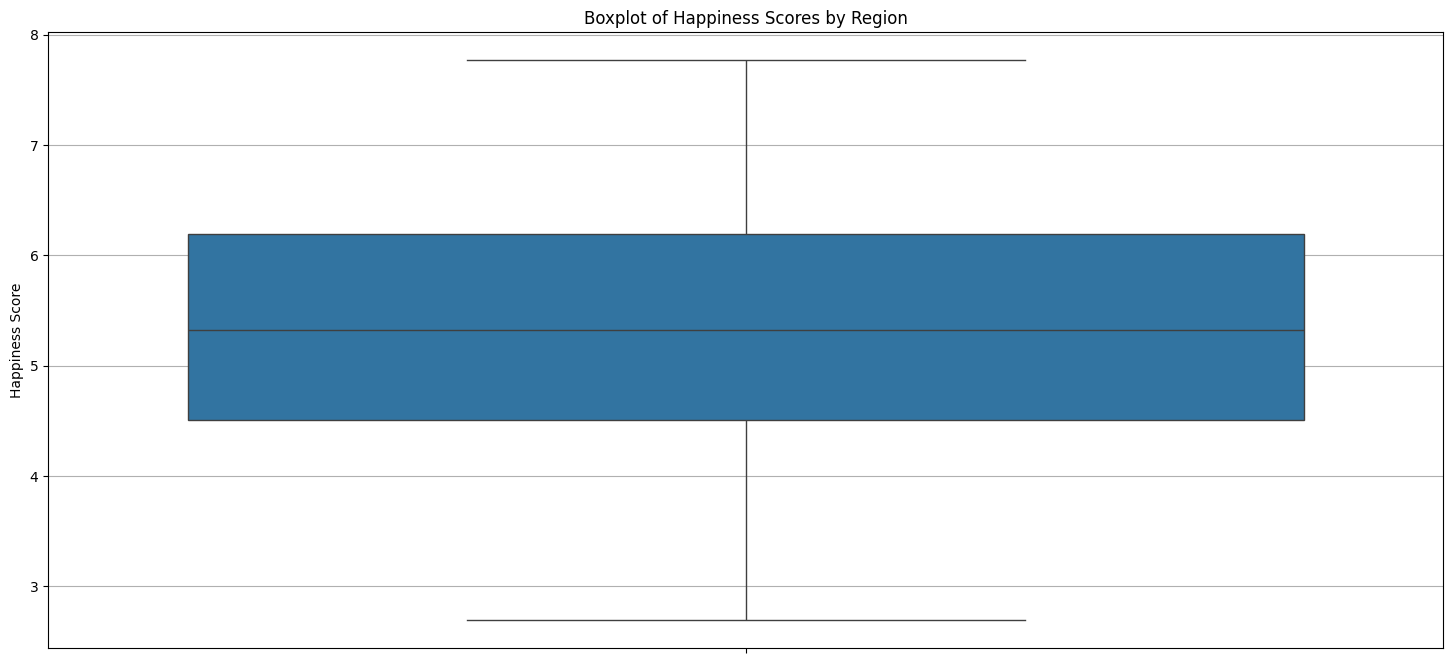

In [ ]:
print("\nQuestion 2 part2(For All Regions)")
# Calculate quartiles and IQR
Q1 = data['Happiness Score'].quantile(0.25)
Q3 = data['Happiness Score'].quantile(0.75)
IQR = Q3 - Q1

# Define IQR boundaries for outliers (adjustable multiplier)
multiplier = 1.5  # Adjust this value to be more or less strict (e.g., 2 or 3)
lower_bound = Q1 - multiplier * IQR
upper_bound = Q3 + multiplier * IQR

# Identify outliers
outliers = data[(data['Happiness Score'] < lower_bound) | (data['Happiness Score'] > upper_bound)]

# Handle cases with no outliers
if outliers.empty:

    print("No extreme outlier happiness scores found based on the current IQR settings.")
else:

    print("Regions with countries having extreme happiness scores:")

    # Group outliers by region and print results
    outlier_regions = outliers['Region'].value_counts()

    for region, count in outlier_regions.items():
        countries = outliers[outliers['Region'] == region]['Country'].tolist()
        print(f"{region}: {count} countries - {', '.join(countries)}")

# Customize the boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(data['Happiness Score']
)
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot of Happiness Scores by Region')
plt.grid(axis='y')
plt.show()


***3. Show how the global happiness score change over time***


Question 3


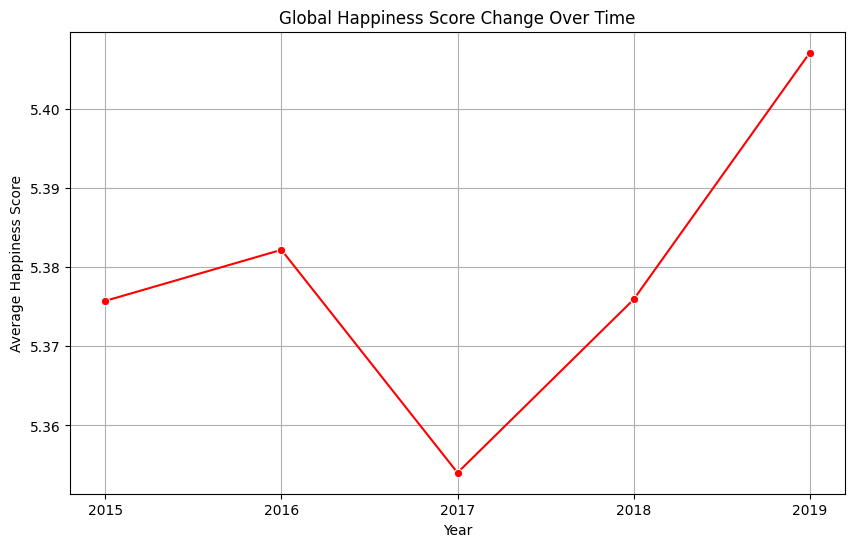

In [ ]:
#Q3
print("\nQuestion 3")
global_happiness_over_time = data.groupby('Year')['Happiness Score'].mean()

# Convert Series to DataFrame with a clear name
global_happiness_over_time_df = global_happiness_over_time.to_frame(name="Global Happiness Score")

# Improved plot using Seaborn for aesthetics
plt.figure(figsize=(10, 6))
sns.lineplot(x=global_happiness_over_time_df.index, y="Global Happiness Score",
             data=global_happiness_over_time_df, marker='o', color='red')
plt.title("Global Happiness Score Change Over Time")
plt.xlabel("Year")
plt.ylabel("Average Happiness Score")
plt.xticks(global_happiness_over_time_df.index)
plt.grid(True)
plt.show()


This line chart shows the average global happiness score from 2015 to 2019. The key observations are:

* 2015: The average happiness score is slightly below 5.38.
* 2016: There is a slight increase, with the score just above 5.38.
* 2017: A noticeable drop occurs, with the score falling below 5.36.
* 2018: The score rebounds to just below 5.38.
* 2019: The most significant increase is observed, with the score reaching above 5.40.

Overall, the global happiness score shows minor fluctuations between 2015 and 2018, with a more substantial rise in 2019.





***4. How does the Happiness Score change by Region?***


Question 4


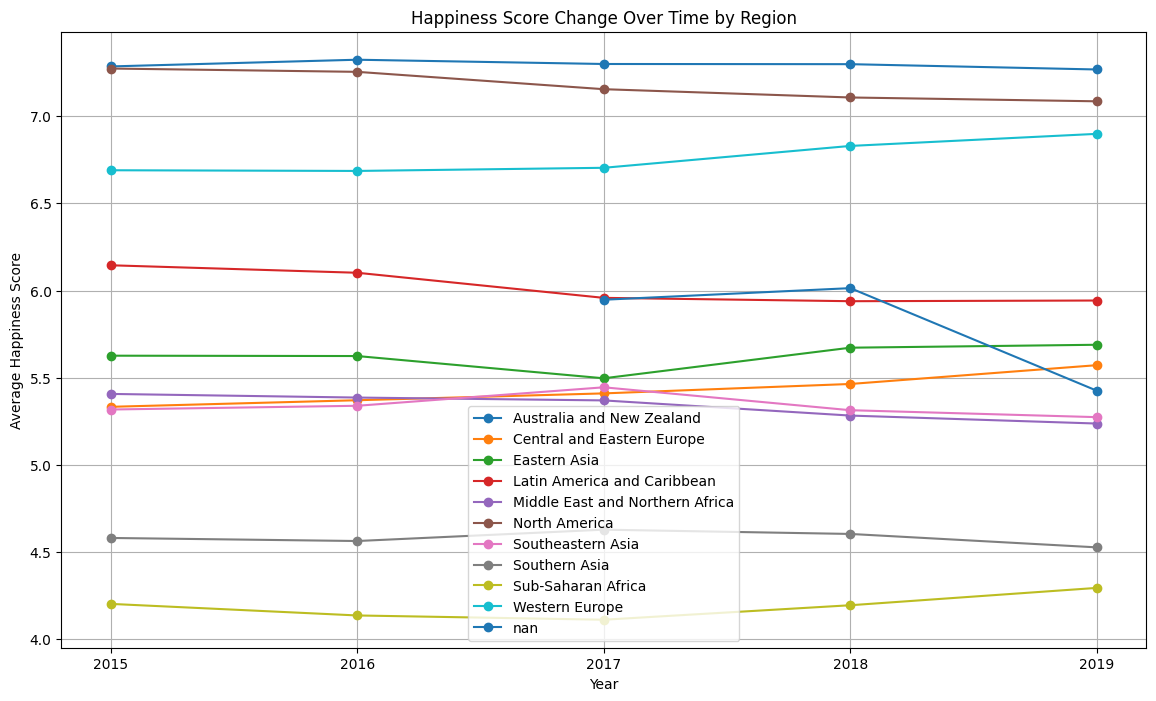

In [ ]:
#Q4
print("\nQuestion 4")
region_happiness_over_time = data.groupby(['Year', 'Region'])['Happiness Score'].mean().unstack()

# Plot the happiness score change over time for each region
plt.figure(figsize=(14, 8))
for region in region_happiness_over_time.columns:
    plt.plot(region_happiness_over_time.index, region_happiness_over_time[region], marker='o', label=region)

plt.title('Happiness Score Change Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.xticks(region_happiness_over_time.index)
plt.legend(loc='best')
plt.grid(True)
plt.show()


This line chart depicts the average happiness score for different regions from 2015 to 2019:

* Australia and New Zealand: Consistently high happiness scores, slightly declining in 2019.
* Western Europe: High and stable scores with minor fluctuations.
* North America: High scores with a slight downward trend.
* Eastern Asia, Latin America, and Caribbean: Moderate scores with small variations, generally showing stability or slight increases.
* Middle East and Northern Africa, Sub-Saharan Africa, Southern Asia: Lower scores compared to other regions, with Sub-Saharan Africa showing a slight upward trend, while the others are relatively stable or declining.
* Central and Eastern Europe, Southeastern Asia: Moderate scores with some fluctuations, generally stable or slightly increasing.

***5. Based on the data and your intuition, how you expect the global happiness score in the following 2 years?***


Question 5
Predicted Global Happiness Scores for the next two years: [5.507096153846154, 5.607096153846155]


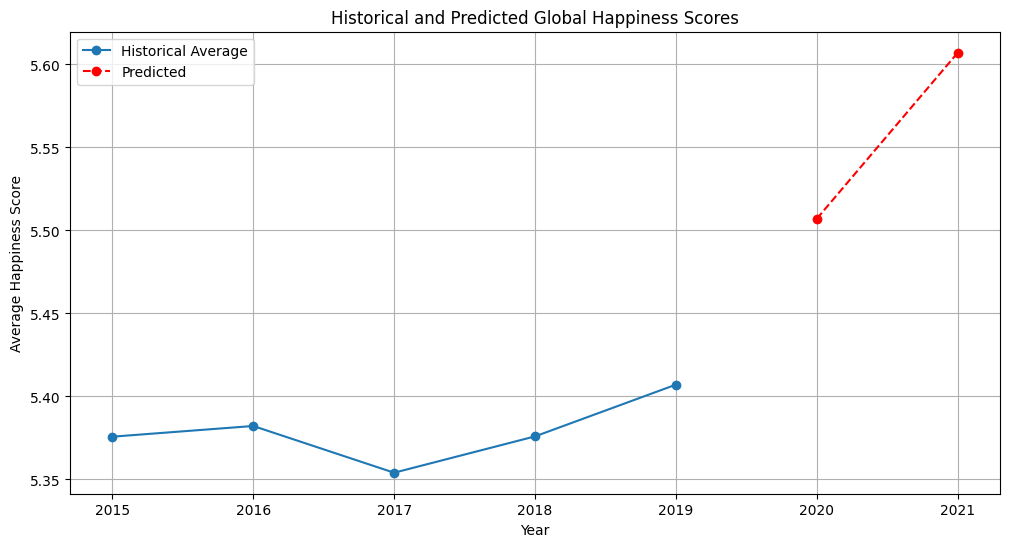

In [13]:
#Q5
print("\nQuestion 5")

# For simplicity, let's just take the average happiness score of the latest year and assume a slight increase or decrease
latest_year = df['Year'].max()
latest_happiness_avg = df[df['Year'] == latest_year]['Happiness Score'].mean()
# We can then predict the global happiness score for the next two years
predicted_scores = [latest_happiness_avg + i * 0.1 for i in range(1, 3)]
print("Predicted Global Happiness Scores for the next two years:", predicted_scores)
# Create a DataFrame for the predicted scores
predicted_data = pd.DataFrame({
    'Year': [latest_year + i for i in range(1, 3)],
    'Happiness Score': predicted_scores
})

# Plot the historical data and predictions
plt.figure(figsize=(12, 6))
historical_avg = data.groupby('Year')['Happiness Score'].mean().reset_index()
plt.plot(historical_avg['Year'], historical_avg['Happiness Score'], marker='o', label='Historical Average')
plt.plot(predicted_data['Year'], predicted_data['Happiness Score'], marker='o', linestyle='--', color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.title('Historical and Predicted Global Happiness Scores')
plt.legend()
plt.grid(True)
plt.show()

Based on the observed trends, i predict the global happiness scores for the next two years by assuming a slight increase.

These predictions are based on the noticeable rise in 2019 and the assumption that this trend will continue with a gradual increase.